# DATA CLEANING WORKSHOP, CDS 2020, Colgate University
## REDUCING NOAA DATASETS
### Fairuz Ishraque'22

## Importing the required Libraries

We will start by importing the required python modules or libraries. 
The two essential libraries for this exercies are **numpy** and **pandas**. If you want to plot your data too it's a good idea to import the matplotlib library.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

## Importing the NOAA .csv file as a pandas Dataframe

Tables in pandas are called dataframes. This format of the table makes it really easy to manipulate the columns and rows of the table for classifying as well as cleaning th dataset.

In [6]:
Data = pd.read_csv('/Users/ishraque/Downloads/DataCleaning2020-master/Helsinki_Station_Data(1952-2017).txt', sep='\s+', na_values='-9999', skiprows=[1])

,STATION,ELEVATION,LATITUDE,LONGITUDE,DATE,PRCP,TAVG,TMAX,TMIN
0,GHCND:FIE00142080,51,60.3269,24.9603,19520101,0.31,37.0,39.0,34.0
1,GHCND:FIE00142080,51,60.3269,24.9603,19520102,NaN,35.0,37.0,34.0
2,GHCND:FIE00142080,51,60.3269,24.9603,19520103,0.14,33.0,36.0,NaN
3,GHCND:FIE00142080,51,60.3269,24.9603,19520104,0.05,29.0,30.0,25.0
4,GHCND:FIE00142080,51,60.3269,24.9603,19520105,0.06,27.0,30.0,25.0
...,...,...,...,...,...,...,...,...,...
23711,GHCND:FIE00142080,51,60.3269,24.9603,20170930,NaN,47.0,49.0,44.0
23712,GHCND:FIE00142080,51,60.3269,24.9603,20171001,0.04,47.0,48.0,45.0
23713,GHCND:FIE00142080,51,60.3269,24.9603,20171002,NaN,47.0,49.0,46.0
23714,GHCND:FIE00142080,51,60.3269,24.9603,20171003,0.94,47.0,NaN,44.0


It's always a good idea to look at the relevant information of the loaded dataframe before proceeding with any form of analysis or editing on the data.

In [ ]:
%matplotlib inline

plt.scatter(Data.index, Data['TAVG'])
plt.xlabel('Index')
plt.ylabel('Daily Average Temperatures (F)')

In [6]:
Data['TAVG'].describe()

count    20408.000000
mean        41.324089
std         16.688849
min        -30.000000
25%         31.000000
50%         41.000000
75%         55.000000
max         80.000000
Name: TAVG, dtype: float64

## Finding the TMAX temperature for the summer of '69

This is an exercise on perfomring string slicing as well as conditional indexing of the dataset

1. Slicing the month numbers out of the DATE column and assigning them to the month names

In [7]:
#Converting the DATE column into string values from integers. This procedure makes the slicing of dates possible
Data['DATE_str'] = Data['DATE'].astype(str)
#Slicing the day values out of DATE_str
Data['DATE_yrmonth'] = Data['DATE_str'].str.slice(start=0, stop=6)
#Converting DATE_str into integer values
Data['DATE_yrmonthint'] = Data['DATE_yrmonth'].astype(int)
#creating a column of integers with the year in them 
Data['DATE_yrint'] = Data['DATE_str'].str.slice(start=0, stop=4)
Data['DATE_yrint'] = Data['DATE_yrint'].astype(int)
#creating a column for just the number of months. This makes the mapping of month names to the month numbers possible
Data['DATE_month'] = Data['DATE_str'].str.slice(start=4, stop=6)

2. Creating a dictionary that maps the month names to the dataset

In [8]:
dict_months = {'01':'January', '02':'February', '03':'March', '04':'April',\
               '05':'May', '06':'June', '07':'July', '08':'August', '09':'September',\
               '10':'October', '11':'November', '12':'December'}

3. Performing a conditional indexing on the dataframe. This is similar to if-else statement you might be familiar with, but now the condtitions are applied to the entire dataframe. In this case we are extracting a subset of our main dataframe as a series that only contains the data from May 1969 to August 1969.

In [9]:
summer69 = Data[(Data['DATE_yrmonthint']>196904)&(Data['DATE_yrmonthint']<196909)]

4. Finally, finding the max tempertaure during the summer of '69

In [10]:
maxtemp69 = summer69['TMAX'].max()
print(maxtemp69)

85.0


And Voila! We're done!

## Calculating Monthly Average Temperatures

This is an exercise on grouping data and iterating through a dataset

1. Grouping the monthly data

In [13]:
monthlyData = pd.DataFrame() #This creates an empty dataframe where we can eventually add our grouped data
grouped1 = Data.groupby('DATE_yrmonth')# This creates the group for each month of each year
mean_cols1 = ['TAVG'] #This assigns the column of the dataset that needs to be averaged for each group we will get from the preious line   

2. Iterating over the group to get the mean monthly temperature values

In [12]:
for key, group in grouped1:
    #aggregating the data
    mean_values1 = group[mean_cols1].mean()
    #adding the key(datetime values) in the aggregated data
    mean_values1['DATE_yrmonth'] = key
    #appending the aggregated data into the monthlyData empty dataframe
    monthlyData = monthlyData.append(mean_values1, ignore_index=True)

3. Creating a column in monthlyData for month numbers and then remapping the month numbers to month names using the previously defined dictionary. Also, creating a column with the Month Numbers as integer values

In [13]:
monthlyData['Month'] = monthlyData['DATE_yrmonth'].str.slice(start=4, stop=6)
monthlyData['Month'] = monthlyData['Month'].map(dict_months)
monthlyData['MonthNum'] = monthlyData['DATE_yrmonth'].str.slice(start=4, stop=6)
monthlyData['MonthNum'] = monthlyData['MonthNum'].astype(int)

4. Creating another column in monthlyData for temperature values in celsius  

In [14]:
monthlyData['TempsC'] = None

5. Writing a function that converts temperatures from Fahrenheit to Celcius

In [15]:
def FahrToCelsius(temp_fahrenheit):
    converted_temp = (temp_fahrenheit-32)/1.8
    return converted_temp 

6. Iterating the conversion through the monthlyData dataframe and adding it to the new column TempsC

In [16]:
for idx, row in monthlyData.iterrows():
    #conversion
    celsius1 = FahrToCelsius(row['TAVG'])
    #appending theses new values to the TempsC column
    monthlyData.loc[idx, 'TempsC'] = celsius1

Now, let's look at the new Dataframe we have created!

In [17]:

monthlyData.head()

,DATE_yrmonth,TAVG,Month,MonthNum,TempsC
0,195201,29.478261,January,1,-1.40097
1,195202,24.800000,February,2,-4
2,195203,13.807692,March,3,-10.1068
3,195204,39.607143,April,4,4.22619
4,195205,44.666667,May,5,7.03704


We can also save this dataframe into a new csv file if we want to!

## Calculating Monthly Temperature Anomalies

Here by temperature anomalies we mean how much the average temperatures for each month in every year throughout the dataset varied from the mean temperature of that month for the whole dataset.

For example, the anomaly for the average temperature of January 1972 is the difference between the avergae temperature of January 1972 from the mean of the average temperatures of all the Januaries recorded in our dataframe.

In [18]:
##creating the column avgTempsC in the Dataframe
Data['avgTempsC'] = None
##iterating the conversion and adding it to the column
for idx, row in Data.iterrows():
    #conversion
    celsius2 = FahrToCelsius(row['TAVG'])
    #adding the values to the empty column
    Data.loc[idx,'avgTempsC'] = celsius2
##grouping data across the years based on the months
referenceTemps = pd.DataFrame()
grouped2 = Data.groupby('DATE_month')
##the columns that we wanna aggregate
mean_cols2 = ['avgTempsC']
##iterating over the groups to get the mean values of each month over the years 1952-80
for key, group in grouped2:
    mean_values2 = group[mean_cols2].mean()
    mean_values2['Month'] = key
    referenceTemps = referenceTemps.append(mean_values2, ignore_index=True)
##mapping month names to month numbers. The dictionary has already been created.
referenceTemps['Month'] = referenceTemps['Month'].map(dict_months)
##merging the tables referenceTemps and monthlyData
monthlyData = monthlyData.merge(referenceTemps, on='Month')
monthlyData['Diff'] = monthlyData['TempsC']-monthlyData['avgTempsC']
monthlyData.head()

,DATE_yrmonth,TAVG,Month,MonthNum,TempsC,avgTempsC,Diff
0,195201,29.478261,January,1,-1.40097,-5.356043,3.95508
1,195301,22.285714,January,1,-5.39683,-5.356043,-0.0407823
2,195401,19.269231,January,1,-7.07265,-5.356043,-1.71661
3,195501,22.148148,January,1,-5.47325,-5.356043,-0.117208
4,195601,17.360000,January,1,-8.13333,-5.356043,-2.77729


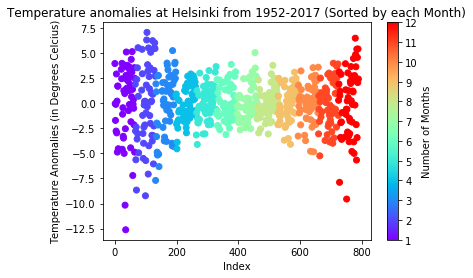

In [19]:
plt.scatter(monthlyData.index, monthlyData['Diff'], c=monthlyData['MonthNum'], cmap='rainbow')
plt.xlabel('Index')
plt.ylabel('Temperature Anomalies (in Degrees Celcius)')
plt.title('Temperature anomalies at Helsinki from 1952-2017 (Sorted by each Month)')
plt.colorbar(ticks=[1,2,3,4,5,6,7,8,9,10,11,12], label='Number of Months') 